In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Get the data

In [254]:
raw_data = pd.read_csv("../../datasets/ames_housing.csv")
raw_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [255]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [256]:
raw_data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [257]:
raw_data.nunique()

Order             2930
PID               2930
MS SubClass         16
MS Zoning            7
Lot Frontage       128
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice         1032
Length: 82, dtype: int64

In [258]:
raw_data.isna().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

## Create test set 

In [259]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42)
print(len(train_set) ,"train +",  len(test_set), "test")

2344 train + 586 test


## Discover and Visualize

In [260]:
housing = train_set.copy()
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
381,382,527359050,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Family,152000
834,835,906475070,60,RL,NaN,28698,Pave,NaN,IR2,Low,...,0,NaN,NaN,NaN,0,6,2009,WD,Abnorml,185000
1898,1899,534429030,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,101800
678,679,535451170,90,RL,60.0,7200,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,90000
700,701,902109130,190,RM,63.0,7627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,94550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1639,527226040,190,RL,195.0,41600,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,155000
1095,1096,528290090,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1130,1131,528490080,60,FV,64.0,8791,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,207500
1294,1295,902109160,50,RM,81.0,7308,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,122250


<Axes: >

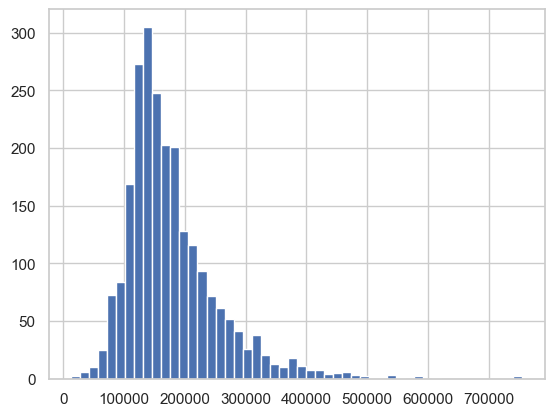

In [261]:
housing["SalePrice"].hist(bins=50)

<Axes: >

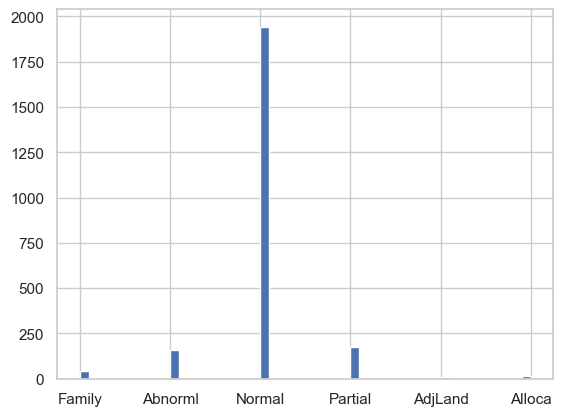

In [262]:
housing["Sale Condition"].hist(bins=50)

In [263]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.795298
Gr Liv Area        0.698315
Garage Cars        0.644304
Garage Area        0.633106
Total Bsmt SF      0.612256
1st Flr SF         0.607433
Year Built         0.545409
Full Bath          0.542053
Year Remod/Add     0.517653
Garage Yr Blt      0.516211
Mas Vnr Area       0.490912
TotRms AbvGrd      0.475455
Fireplaces         0.467501
BsmtFin SF 1       0.423906
Wood Deck SF       0.333045
Lot Frontage       0.328726
Open Porch SF      0.297722
Bsmt Full Bath     0.286515
Half Bath          0.285369
2nd Flr SF         0.278977
Lot Area           0.261336
Bsmt Unf SF        0.163571
Bedroom AbvGr      0.149269
Screen Porch       0.136936
Pool Area          0.079020
3Ssn Porch         0.034845
Mo Sold            0.030714
BsmtFin SF 2       0.027205
Low Qual Fin SF   -0.016025
Misc Val          -0.017729
Order             -0.020621
Bsmt Half Bath    -0.023675
Yr Sold           -0.037686
MS SubClass       -0.066351
Overall Cond      -0

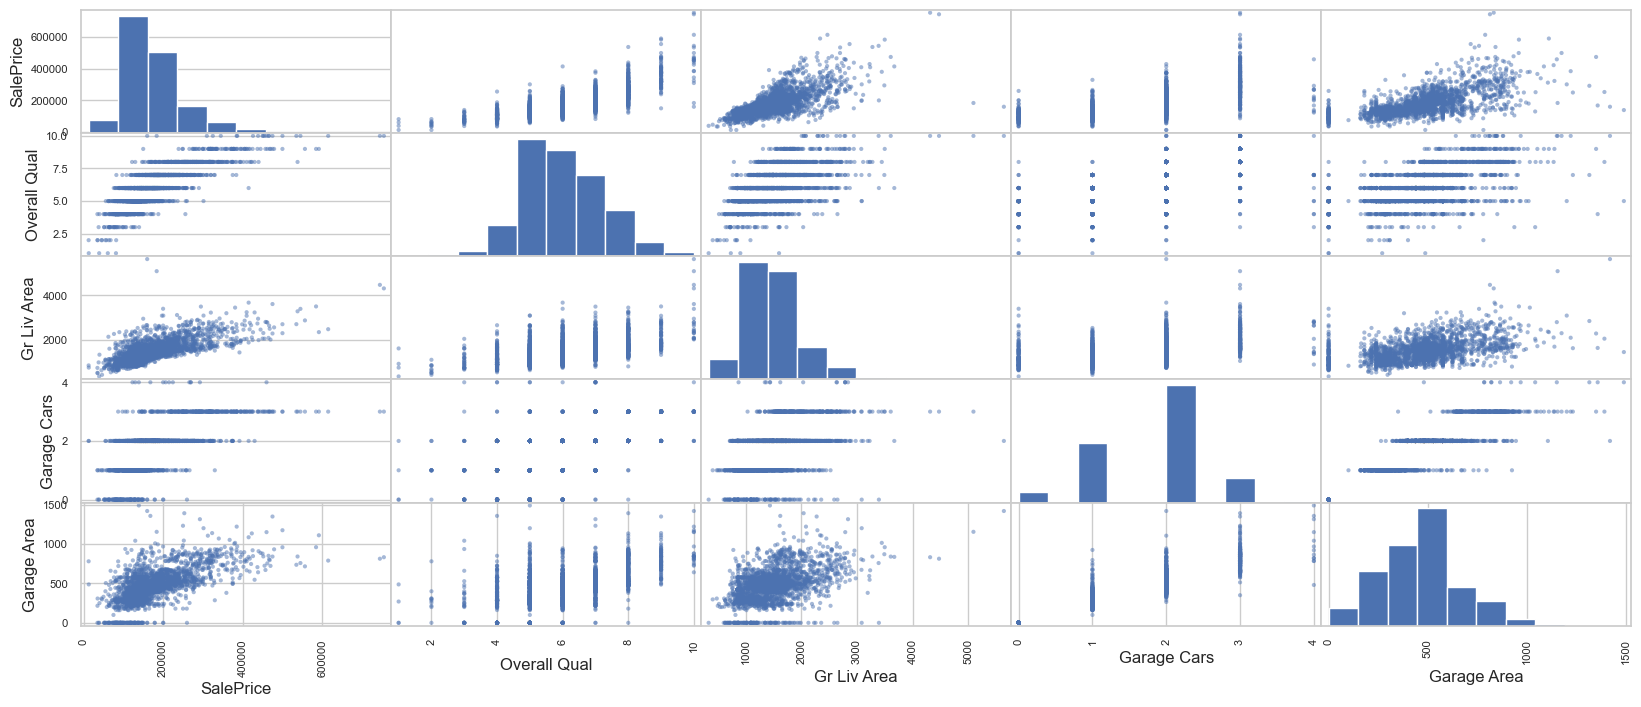

In [264]:
from pandas.plotting import scatter_matrix
positive_attributes = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area']
scatter_matrix(housing[positive_attributes], figsize=(20,8))
plt.show()

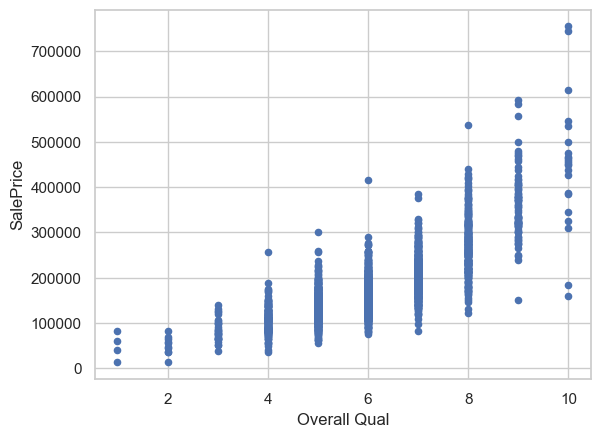

In [265]:
housing.plot(kind="scatter", x="Overall Qual", y="SalePrice")
plt.show()

In [266]:
housing["Age"] = housing["Yr Sold"] - housing["Year Built"]
housing["Total Liv Area"] = housing["Gr Liv Area"] + housing["Total Bsmt SF"]
housing["GarageAge"] = housing["Yr Sold"] - housing["Garage Yr Blt"]
housing["CarsPerGarageArea"] = housing["Garage Cars"] / housing["Garage Area"]
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice            1.000000
Overall Qual         0.795298
Total Liv Area       0.774757
Gr Liv Area          0.698315
Garage Cars          0.644304
Garage Area          0.633106
Total Bsmt SF        0.612256
1st Flr SF           0.607433
Year Built           0.545409
Full Bath            0.542053
Year Remod/Add       0.517653
Garage Yr Blt        0.516211
Mas Vnr Area         0.490912
TotRms AbvGrd        0.475455
Fireplaces           0.467501
BsmtFin SF 1         0.423906
Wood Deck SF         0.333045
Lot Frontage         0.328726
Open Porch SF        0.297722
Bsmt Full Bath       0.286515
Half Bath            0.285369
2nd Flr SF           0.278977
Lot Area             0.261336
Bsmt Unf SF          0.163571
Bedroom AbvGr        0.149269
Screen Porch         0.136936
Pool Area            0.079020
3Ssn Porch           0.034845
Mo Sold              0.030714
BsmtFin SF 2         0.027205
Low Qual Fin SF     -0.016025
Misc Val            -0.017729
Order               -0.020621
Bsmt Half 

## Prepare the data for ML algorithms

In [267]:
housing = train_set.drop("SalePrice", axis=1)
housing_labels = train_set["SalePrice"].copy()

In [268]:
housing.isna().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      393
                 ... 
Misc Val            0
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
Length: 81, dtype: int64

In [269]:
housing_numerical = housing.select_dtypes(include='number')
housing_categorical = housing.select_dtypes(include='object')

In [270]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_numerical)
housing_numerical.median().values , imputer.statistics_

(array([1.4660000e+03, 5.3545406e+08, 5.0000000e+01, 6.8000000e+01,
        9.3565000e+03, 6.0000000e+00, 5.0000000e+00, 1.9720000e+03,
        1.9920000e+03, 0.0000000e+00, 3.7500000e+02, 0.0000000e+00,
        4.6200000e+02, 9.8800000e+02, 1.0820000e+03, 0.0000000e+00,
        0.0000000e+00, 1.4365000e+03, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.0000000e+00, 1.0000000e+00,
        6.0000000e+00, 1.0000000e+00, 1.9780000e+03, 2.0000000e+00,
        4.7600000e+02, 0.0000000e+00, 2.6000000e+01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        6.0000000e+00, 2.0080000e+03]),
 array([1.4660000e+03, 5.3545406e+08, 5.0000000e+01, 6.8000000e+01,
        9.3565000e+03, 6.0000000e+00, 5.0000000e+00, 1.9720000e+03,
        1.9920000e+03, 0.0000000e+00, 3.7500000e+02, 0.0000000e+00,
        4.6200000e+02, 9.8800000e+02, 1.0820000e+03, 0.0000000e+00,
        0.0000000e+00, 1.4365000e+03, 0.0000000e+00, 0.0000000e+00,
        

In [271]:
X = imputer.transform(housing_numerical)
housing_numerical_imputed = pd.DataFrame(X, columns=housing_numerical.columns)
housing_numerical_imputed.isna().sum()

Order              0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
dtype: int64

In [272]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = encoder.fit_transform(housing_categorical)
housing_cat_1hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(2344, 279))

## Custom Transformers

In [273]:
from sklearn.base import BaseEstimator, TransformerMixin

yr_sold_ix, yr_built_ix, grlivarea_ix, totalbsmtsf_ix, gryr_built_ix= [list(housing_numerical.columns).index(col) for col in ("Yr Sold", "Year Built", "Gr Liv Area", "Total Bsmt SF", "Garage Yr Blt")]
extra_attributes = ["house_age", "total_liv_area", "garage_age"]
class HousingFeatureAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        house_age = X[:, yr_sold_ix] - X[:, yr_built_ix]
        total_liv_area = X[:, grlivarea_ix] + X[:, totalbsmtsf_ix]
        garage_age = X[:,yr_sold_ix] - X[:, gryr_built_ix]
        return np.c_[X, house_age, total_liv_area, garage_age]

add_housing_feat = HousingFeatureAdder()
added_attr = add_housing_feat.fit_transform(housing_numerical.values)
added_attr


array([[3.8200000e+02, 5.2735905e+08, 2.0000000e+01, ..., 3.3000000e+01,
        2.4600000e+03, 3.3000000e+01],
       [8.3500000e+02, 9.0647507e+08, 6.0000000e+01, ..., 4.2000000e+01,
        3.1390000e+03, 4.2000000e+01],
       [1.8990000e+03, 5.3442903e+08, 9.0000000e+01, ..., 4.5000000e+01,
        1.2240000e+03, 4.5000000e+01],
       ...,
       [1.1310000e+03, 5.2849008e+08, 6.0000000e+01, ..., 5.0000000e+00,
        2.5920000e+03, 5.0000000e+00],
       [1.2950000e+03, 9.0210916e+08, 5.0000000e+01, ..., 8.8000000e+01,
        2.6760000e+03, 8.8000000e+01],
       [8.6100000e+02, 9.0722711e+08, 8.5000000e+01, ..., 3.7000000e+01,
        1.5360000e+03, 3.5000000e+01]], shape=(2344, 41))

In [274]:
housing_attribs = pd.DataFrame(
    added_attr,
    columns=list(housing_numerical.columns)+ extra_attributes,
    index=housing.index)
housing_attribs.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,house_age,total_liv_area,garage_age
381,382.0,527359050.0,20.0,80.0,10400.0,7.0,5.0,1976.0,1976.0,189.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2009.0,33.0,2460.0,33.0
834,835.0,906475070.0,60.0,NaN,28698.0,5.0,5.0,1967.0,1967.0,0.0,...,0.0,0.0,225.0,0.0,0.0,6.0,2009.0,42.0,3139.0,42.0
1898,1899.0,534429030.0,90.0,70.0,9842.0,4.0,5.0,1962.0,1962.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2007.0,45.0,1224.0,45.0
678,679.0,535451170.0,90.0,60.0,7200.0,4.0,5.0,1949.0,1950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2009.0,60.0,1040.0,53.0
700,701.0,902109130.0,190.0,63.0,7627.0,4.0,6.0,1920.0,1950.0,0.0,...,148.0,0.0,0.0,0.0,0.0,10.0,2009.0,89.0,2301.0,NaN


## Transformation Pipeline

In [324]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attr = housing_numerical.columns.tolist()
cat_attr = housing_categorical.columns.tolist()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("feature_adder", HousingFeatureAdder()),
    ("scaler", StandardScaler())
])

fully_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_attr),
    ("cat_pipeline", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_attr),
])
housing_prepared = fully_pipeline.fit_transform(housing)
housing_prepared

array([[-1.28416649, -0.99127325, -0.87181667, ...,  1.        ,
         0.        ,  0.        ],
       [-0.74667397,  1.01834864,  0.06290638, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.51578087, -0.95379663,  0.76394867, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.39546473, -0.98527787,  0.06290638, ...,  0.        ,
         1.        ,  0.        ],
       [-0.20087583,  0.99520579, -0.17077438, ...,  0.        ,
         1.        ,  0.        ],
       [-0.71582451,  1.02233507,  0.64710829, ...,  0.        ,
         1.        ,  0.        ]], shape=(2344, 320))

## Linear Regression

In [294]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
predictions = lin_reg.predict(housing_prepared)
print("Predictions", predictions[:5])

Predictions [141399.11450369 183919.71829755  79997.73202454  85310.97391496
 120873.74279251]


In [295]:
print("Labels", housing_labels[:5].tolist())

Labels [152000, 185000, 101800, 90000, 94550]


In [296]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse = float(lin_rmse)
lin_rmse

18786.4380980603

## Decision Tree Regression

In [297]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
predictions = tree_reg.predict(housing_prepared)
print("Predictions", predictions[:5])

Predictions [152000. 185000. 101800.  90000.  94550.]


In [298]:
print("Labels", housing_labels[:5].tolist())

Labels [152000, 185000, 101800, 90000, 94550]


In [299]:
tree_mse = mean_squared_error(housing_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse = float(tree_rmse)
tree_rmse

0.0

## Random Forest Regression

In [300]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
predictions = forest_reg.predict(housing_prepared)
print("Predictions", predictions[:5])

Predictions [152580.04 183146.   101218.58  90853.5   97915.5 ]


In [301]:
print("Labels", housing_labels[:5].tolist())

Labels [152000, 185000, 101800, 90000, 94550]


In [302]:
forest_mse = mean_squared_error(housing_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse = float(forest_rmse)
forest_rmse

9477.41039222408

## Compare Models

In [303]:
compare_models = pd.DataFrame({
    "Linear Regression": [lin_rmse],
    "Decision Tree Regression": [tree_rmse],
    "Random Forest Regression": [forest_rmse]
})     
compare_models

,Linear Regression,Decision Tree Regression,Random Forest Regression
0,18786.438098,0.0,9477.410392


The Decision Tree shows very strong performance on the training data, but this likely reflects overfitting. We will validate and tune the model using cross-validation with GridSearch

## GridSearch

In [304]:
from sklearn.model_selection import GridSearchCV

tree_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    {
        "max_depth": [None, 5, 10, 20],
        "min_samples_leaf": [1, 5, 10, 20]
    },
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

tree_grid.fit(housing_prepared, housing_labels)
tree_grid.best_score_

np.float64(-1103345142.958195)

In [305]:
forest_grid = GridSearchCV(
   RandomForestRegressor(random_state=42),
    {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_leaf": [1, 5, 10]
    },
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

forest_grid.fit(housing_prepared, housing_labels)
forest_grid.best_score_

np.float64(-682037832.3470031)

In [306]:
tree_rmse = np.sqrt(-tree_grid.best_score_)
forest_rmse = np.sqrt(-forest_grid.best_score_)

pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "CV RMSE": [tree_rmse, forest_rmse]
}).sort_values("CV RMSE")

,Model,CV RMSE
1,Random Forest,26115.854042
0,Decision Tree,33216.639549


Cross-validation results indicate that the Random Forest model outperforms the Decision Tree model. Its lower RMSE suggests improved generalization performance, which is consistent with the variance reduction achieved through ensemble learning

## Analyze the Best Models and Their Errors

In [307]:
feature_importances = forest_grid.best_estimator_.feature_importances_
feature_importances

array([2.92595227e-03, 7.03756585e-03, 1.09190083e-03, 3.75138299e-03,
       1.16834162e-02, 4.97262430e-01, 3.25262325e-03, 1.31666079e-02,
       9.74563770e-03, 3.29118824e-03, 9.22193425e-03, 3.31928482e-04,
       7.72724063e-03, 4.34508054e-03, 4.00069845e-03, 1.94709869e-02,
       4.86691190e-05, 1.33051531e-02, 2.18642258e-03, 1.67464196e-04,
       1.42296491e-03, 3.63763266e-04, 1.05024099e-03, 3.64835573e-04,
       1.13761219e-03, 1.54712925e-03, 2.24900235e-03, 4.81309749e-03,
       9.66672060e-03, 2.83661168e-03, 2.64588489e-03, 5.85455455e-04,
       3.70631041e-05, 3.70860027e-03, 2.06363708e-04, 1.24193366e-04,
       2.06446285e-03, 5.85827570e-04, 1.33718435e-02, 2.84383235e-01,
       2.05807968e-03, 2.39687012e-06, 9.38740787e-05, 5.74343019e-05,
       1.72703314e-08, 7.30534134e-06, 1.52263327e-03, 7.52310476e-04,
       8.44092247e-06, 1.30361621e-05, 3.15181568e-05, 5.63889172e-05,
       1.03335045e-04, 3.27208151e-04, 1.33885936e-04, 1.42975497e-04,
      

In [308]:
cat_encoder = fully_pipeline.named_transformers_["cat_pipeline"]
cat_attributes = list(cat_encoder.get_feature_names_out(housing_categorical.columns))
num_attributes = housing_numerical.columns.tolist()
full_attr = num_attributes + cat_attributes + extra_attributes
sorted(zip(feature_importances, full_attr), reverse=True)

[(np.float64(0.4972624296194572), 'Overall Qual'),
 (np.float64(0.28438323482311084), 'MS Zoning_C (all)'),
 (np.float64(0.019470986860913562), '2nd Flr SF'),
 (np.float64(0.013371843458987844), 'MS Zoning_A (agr)'),
 (np.float64(0.01330515313877072), 'Gr Liv Area'),
 (np.float64(0.013166607889847649), 'Year Built'),
 (np.float64(0.011683416173940685), 'Lot Area'),
 (np.float64(0.009745637697035502), 'Year Remod/Add'),
 (np.float64(0.009666720604987338), 'Garage Area'),
 (np.float64(0.009221934254558735), 'BsmtFin SF 1'),
 (np.float64(0.007727240630948059), 'Bsmt Unf SF'),
 (np.float64(0.007037565845261546), 'PID'),
 (np.float64(0.005166672099369018), 'Bsmt Qual_Po'),
 (np.float64(0.004813097487312324), 'Garage Cars'),
 (np.float64(0.0043450805368194035), 'Total Bsmt SF'),
 (np.float64(0.004000698449288002), '1st Flr SF'),
 (np.float64(0.0037513829876978625), 'Lot Frontage'),
 (np.float64(0.0037086002744552626), 'Screen Porch'),
 (np.float64(0.003291188244834254), 'Mas Vnr Area'),
 (np

## Evaluate Your Sytem on Test Set

In [329]:
final_model = forest_grid.best_estimator_

X_test = test_set.drop("SalePrice", axis=1)
y_test = test_set["SalePrice"].copy()

X_test_prepared = fully_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(25420.25526521152)

In [333]:
final_rmse < float(np.sqrt(-forest_grid.best_score_))

tree_rmse, lin_rmse, forest_rmse

(np.float64(33216.63954945164),
 18786.4380980603,
 np.float64(26115.854042075727))